In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [44]:
w = np.random.rand(100)
w.shape
N = 100
x_intial = np.random.rand(N)
y_initial = np.random.rand(N)
z_initial = np.random.rand(N)
initial_vals = []
initial_vals.extend(x_intial)
initial_vals.extend(y_initial)
initial_vals.extend(z_initial)
xyz = initial_vals
x = np.array(xyz[0:100])
y = np.array(xyz[100:200])
z = np.array(xyz[200:300])

In [45]:

def rossler(t, xyz, a, b, c, N, k, Iext,d):
    w= np.random.uniform(0.5,1.5,(100,1))
    x = np.array(xyz[0:100])
    y = np.array(xyz[100:200])
    z = np.array(xyz[200:300])
    x_mean = np.mean(x)
    np.shape(x_mean)
    dxdt = -y - z + k * (d - x_mean) + Iext
    dydt = x + a * y
    dzdt = b + z * (x - c)
    diff = []
    diff.extend(dxdt)
    diff.extend(dydt)
    diff.extend(dzdt)
    return np.array(diff).flatten()


a = 0.35
b = 0.2
c = 5.7
N = 100
Iext=0
d=400
w= np.random.rand(100)*0.5+1
np.random.seed(7)
x_intial = np.random.rand(N)
y_initial = np.random.rand(N)
z_initial = np.random.rand(N)
initial_vals = []
initial_vals.extend(x_intial)
initial_vals.extend(y_initial)
initial_vals.extend(z_initial)

k=0.001

t_span = (0, 1000) #start to end
t_eval = np.linspace(*t_span, 500000) #dt=0.001 or 1000 samples/sec


sol = solve_ivp(rossler, t_span, initial_vals, args=(a, b, c,N,k,Iext,d), t_eval=t_eval,vectorized=True)


In [50]:
print(len(initial_vals))
a = initial_vals[0:100]
b = initial_vals[100:200]
c = initial_vals[200:300]
#print(a)
#print(b)
#print(c)

300


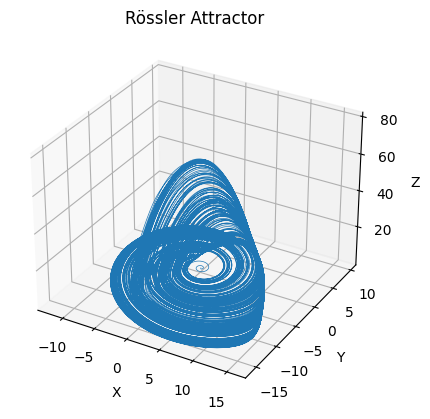

In [51]:
x_solved = np.array(sol.y)[0,:] #(1st in array,10000 values)
y_solved = np.array(sol.y[100,:]) #(101st in array,10000 values)
z_solved = np.array(sol.y[200,:]) #(201st in array,10000 values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_solved, y_solved, z_solved, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rössler Attractor')
plt.show()

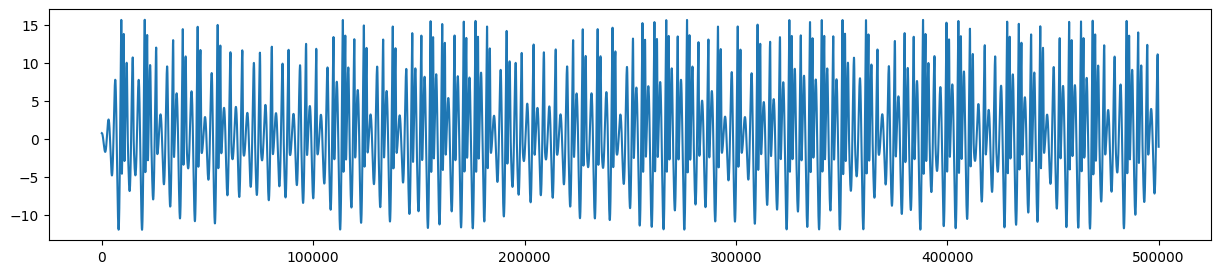

In [12]:
x_vals = np.array(sol.y)[0:100,:]
x_solved = np.array(sol.y)[1,:]
plt.figure(figsize = (15,3))
plt.plot(x_solved)


In [7]:
np.shape(x_vals[0:1])

(1, 100000)

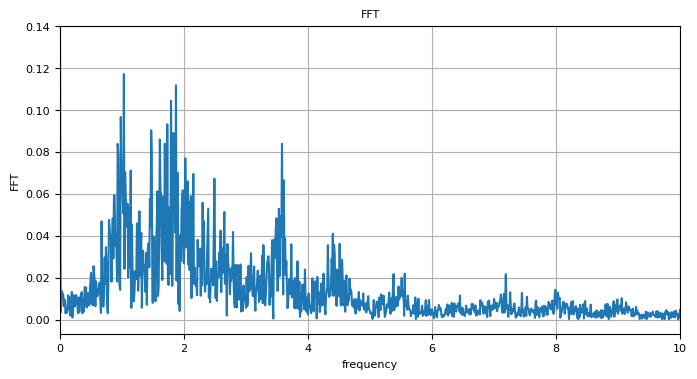

In [18]:
sampling_rate = 5000
fft_output = np.fft.fft(x_vals[0])
N_fft = len(fft_output)
#print(N_fft)
n = np.arange(N_fft)
T = N_fft/sampling_rate
freq = n/T
#print(fft_output)

plt.figure(figsize = (8,4))
plt.plot(freq, (np.abs(fft_output)/np.linalg.norm(np.abs(fft_output))))
plt.xlim(0,10)
#plt.ylim(0,1)
plt.title('FFT',fontsize="8")
plt.xlabel('frequency',fontsize="8")
plt.ylabel('FFT',fontsize="8")
plt.xticks(fontsize="8")
plt.yticks(fontsize = '8')
plt.grid()

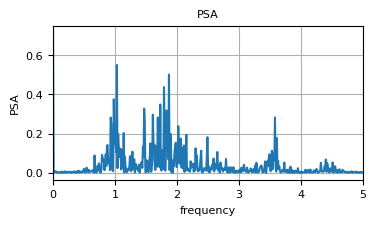

In [15]:
#Power Spectral Analysis
psa=np.square(np.abs(fft_output))/(N_fft*N_fft)
plt.figure(figsize = (4,2))
plt.plot(freq,psa)
plt.xlim(0,5)
plt.title('PSA',fontsize="8")
plt.xlabel('frequency',fontsize="8")
plt.ylabel('PSA',fontsize="8")
plt.xticks(fontsize="8")
plt.yticks(fontsize = '8')
plt.grid()

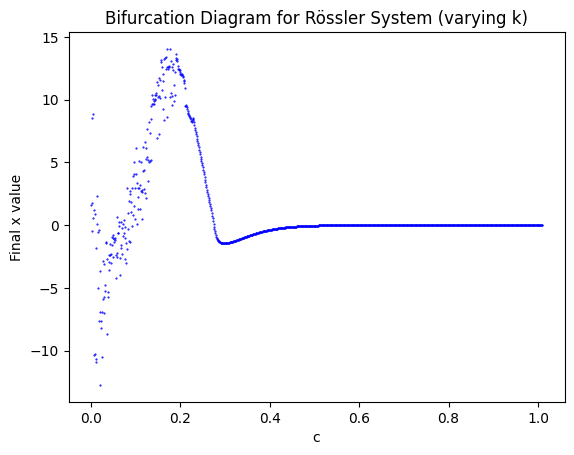

In [52]:
def rossler(t, xyz, a, b, c, Q, N, k):
    x, y, z = xyz
    x_mean = np.mean(x)
    dxdt = -y - z + k * (Q* x_mean - x)
    dydt = x + a * y
    dzdt = b + z * (x - c)
    return [dxdt, dydt, dzdt]

a = 0.2
b = 0.2
c=9
Q=0.5
k_values =np.arange(0,1.01,0.001)
x0 = initial_vals[1]
y0 = initial_vals[100]
z0 =initial_vals[200]

t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)
bifurcation_data = []

# Iterate over k values
for k in k_values:
    sol = solve_ivp(rossler, t_span, [x0, y0, z0], args=(a, b, c,Q,N,k), t_eval=t_eval)
    bifurcation_data.append(sol.y[0][-1])

plt.plot(k_values, bifurcation_data, 'b.', markersize=1)
plt.xlabel('c')
plt.ylabel('Final x value')
plt.title('Bifurcation Diagram for Rössler System (varying k)')
plt.show()

In [ ]:
plt.plot(k_values, bifurcation_data[0,], 'b.', markersize=1)
plt.plot(k_values, bifurcation_data[1,], 'b.', markersize=1)
plt.xlabel('k')
plt.ylabel('Final x value')
plt.title('Bifurcation Diagram for Rössler System (varying k)')
plt.show()

In [11]:
def shannon_entropy(probabilities):
    non_zero_probabilities = probabilities[probabilities != 0]
    entropy = -np.sum(non_zero_probabilities * np.log2(non_zero_probabilities))
    return entropy

probabilities = np.array([0.2, 0.9, 0.1, 0.4, 0])
entropy = shannon_entropy(probabilities)

print(entropy)


1.4621524505216983


(2.0, 9.0)

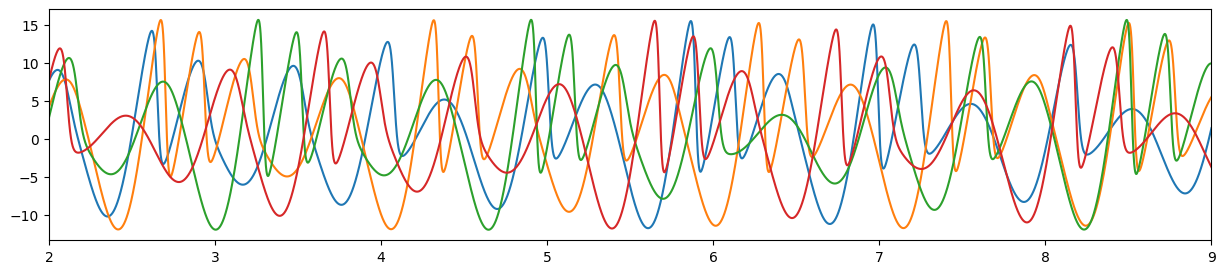

In [16]:
plt.figure(figsize = (15,3))
t = np.linspace(0,500000/5000,500000)
plt.plot(t,x_vals[0])
plt.plot(t,x_vals[2])
plt.plot(t,x_vals[3])
plt.plot(t,x_vals[4])
plt.xlim(2,9)

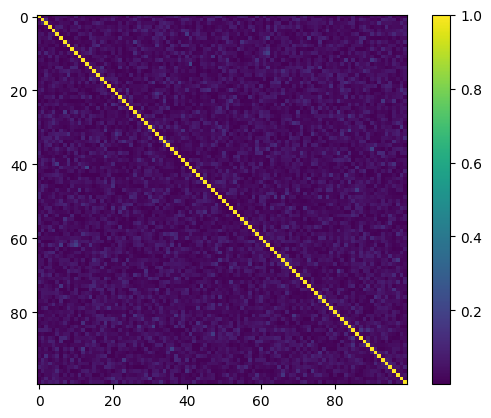

In [17]:
z_vals = sol.y[200:300,:]
y_vals=sol.y[100:200,:]
b=np.corrcoef((x_vals))

plt.imshow(np.abs(b))
plt.colorbar()

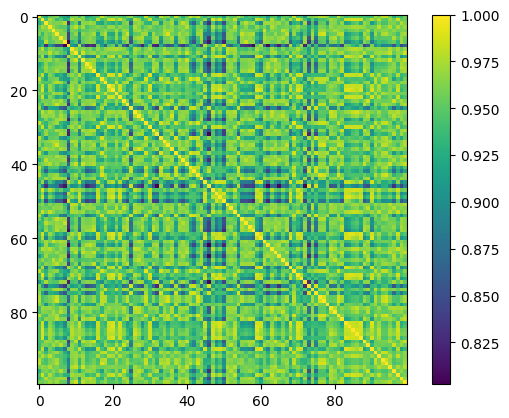

In [14]:
def rossler(t, xyz, a, b, c, Q, N, k, Iext):
    x = xyz[0:100]
    y = xyz[100:200]
    z = xyz[200:300]
    x_mean = np.mean(x)
    dxdt = -y - z + k * (Q* x_mean - x) + Iext
    dydt = x + a * y
    dzdt = b + z * (x - c)
    diff = []
    diff.extend(dxdt)
    diff.extend(dydt)
    diff.extend(dzdt)
    return np.array(diff).flatten()


a = 0.2
b = 0.2
c = 5.7
N = 100
Iext=0
np.random.seed(7)
x_intial = np.random.rand(N)
y_initial = np.random.rand(N)
z_initial = np.random.rand(N)
initial_vals = []
initial_vals.extend(x_intial)
initial_vals.extend(y_initial)
initial_vals.extend(z_initial)

Q=0.2
k=0.05

t_span = (0, 1000) #start to end
t_eval = np.linspace(*t_span, 100000) #dt=0.001 or 1000 samples/sec


sol = solve_ivp(rossler, t_span, initial_vals, args=(a, b, c,Q,N,k,Iext), t_eval=t_eval,vectorized=True)
f=np.corrcoef((sol.y[0:100,:]))
plt.imshow(np.abs(f))
plt.colorbar()